Linear Models for Regression & Classification

Simple Linear Regression using Ordinary Least Squares
Gradient Descent Algorithm
Regularized Regression Methods - Ridge, Lasso, ElasticNet
Logistic Regression for Classification
OnLine Learning Methods - Stochastic Gradient Descent & Passive Aggrasive
Robust Regression - Dealing with outliers & Model errors
Polynomial Regression
Bias-Variance Tradeoff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Simple Linear Regression using Ordinary Least Squares

Feature consist of p independent variables (p-dim)
Target/dependent variable is represented by y
Relation between feature & target is represented by the following equation
w's represent weights or coef's for each feature, w0 is intercept

In [2]:
from sklearn.linear_model import LinearRegression

Residual Squared Sum (RSS) of Error - Sum of square of difference between actual value & predicted value

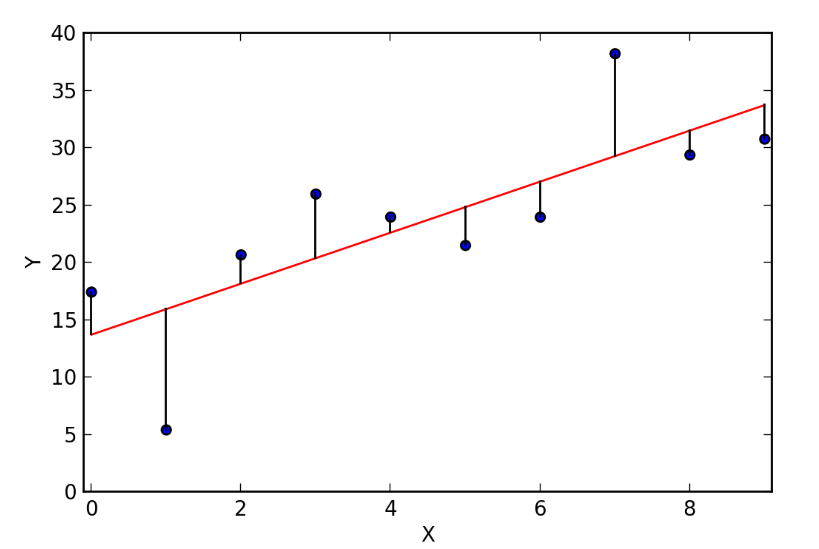

Gradient Descent

LinearRegression tries to minimize RSS using Gradient Descent.
The objective of Gradient Descent is the obtain best weights such that RSS is minimal.

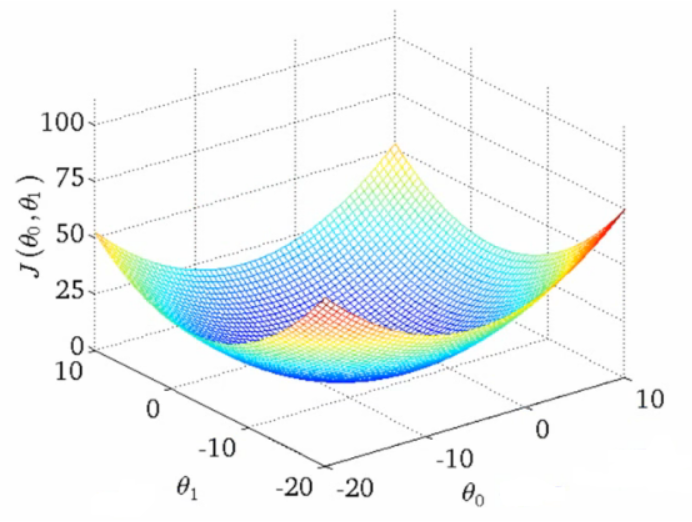

Feature Transformation

Understanding Math behind gradient descent with simplified notation

Prediction, y_p = Ax+B
Actual, y
Simplified Loss for caclulation, Loss = 1/2 *sum(y_p - y)^2

Algorithm
Randomly initialize weights A & B
Calculate gradient .i.e change in Loss when A & B are changed.
Change weights by gradients calculated & reduce the loss
Repeat the whole process till weights don't significantly reduce any further

Genrating Regression Dataset

n_features - number of features to be considered
noise - deviation from straight line
n_samples - number of samples

In [3]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_features=1, noise=10, n_samples=1000)

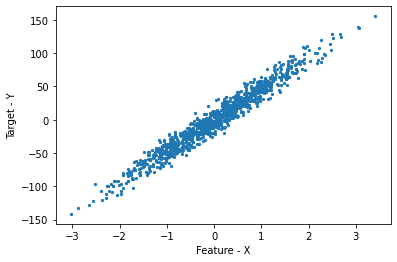

In [4]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

Hyper-parameters are initial configuration of Models
Initialize LinearRegression model with default hyper-parameters

In [5]:
lr = LinearRegression()

Common Hyperparameters

fit_interceprt - Whether to calculate intercept for the model, not required if data is centered
normalize - X will be normalized by subtracting mean & dividing by standard deviation

PS: By stanrdadizing data before subjecting to model, coef's tells the importance of features

Common Attributes

coef - weights for each independent variables
intercept - bias of independent term of linear models

Common Functions

fit - trains the model. Takes X & Y
predict - Once model is trained, for given X using predict function Y can be predicted

Multiple Target

Y can be of more than 1 dimension
Advantages of multiple target are
computationally fast
model is optimized for multiple targets
model do not use relationship between targets
model is more interpretable

Training model

X should be in rows of data format, X.ndim == 2
Y should be 1D for simgle target & 2D for more than one target
fit function for training the model

In [7]:
lr.fit(X,Y)

LinearRegression()

In [8]:
lr.coef_

array([46.56749597])

In [9]:
lr.intercept_

-0.28698352652509157

Predicting using trained model

In [10]:
pred = lr.predict(X)

Blue dots represent maps to actual target data
Orange dots represent predicted data

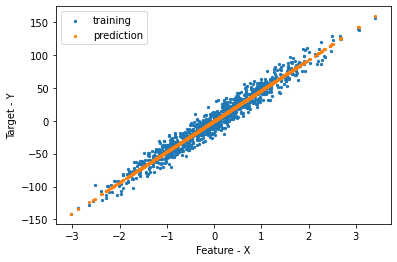

In [11]:
plt.scatter(X,Y,s=5, label='training')
plt.scatter(X,pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

Limitation of Ordinary Least Square Technique

Impacted by Outliers
Non-linearities
Too many independent variables
Multicollinearity
Heteroskedasticity
Noise in the Independent Variables

Regularized Regression Methods

Ridge Regression

Ridge Regression imposes penalty on size of coef.
Less impacted by outliers.

Adding outliers to data

In [24]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
clf = linear_model.Ridge (alpha = .5)
clf.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Ridge(alpha=0.5)

In [29]:
ridge = Ridge(alpha=.1)
lr = LinearRegression()
ridge.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])
lr.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

LinearRegression()

In [30]:
ridge.coef_

array([0.44186047, 0.44186047])

In [31]:
lr.coef_

array([0.475, 0.475])

In [32]:
outliers = Y[950:] - 600

In [33]:
import numpy as np
Y_Out = np.append(Y[:950],outliers)

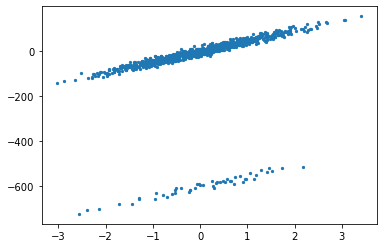

In [34]:
plt.scatter(X,Y_Out,s=5)

In [35]:
lr.fit(X,Y_Out)

LinearRegression()

In [36]:
pred_Out = lr.predict(X)

Text(0.5, 1.0, 'Linear Regression')

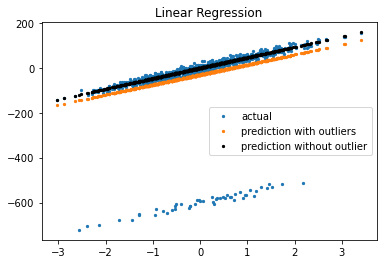

In [37]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5,label='prediction with outliers')
plt.scatter(X,pred,s=5,c='k', label='prediction without outlier')
plt.legend()
plt.title('Linear Regression')

In [38]:
lr.coef_

array([44.65210327])

In [39]:
ridge = Ridge(alpha=1000)

In [40]:
ridge.fit(X,Y_Out)

Ridge(alpha=1000)

In [41]:
pred_ridge = ridge.predict(X)

Text(0.5, 1.0, 'Linear Regression')

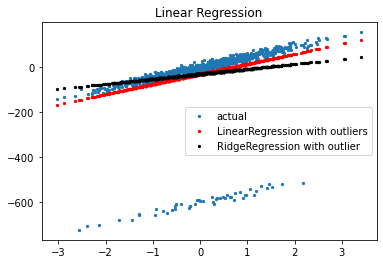

In [42]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5, c='r' ,label='LinearRegression with outliers')
plt.scatter(X,pred_ridge,s=5,c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [43]:
ridge.coef_

array([22.12655607])

Effects of alpha using Ridge on Coeficients

Data generation

In [44]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

In [45]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

Training Ridge for different values of alpha

Coefs calculated are appended to a list
Generate 20 alphas from 10^-6 to 10^6

In [46]:
alphas = np.logspace(-6, 6, 200)
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [47]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

Plotting alphas & coefs

Different colors represents different coefs

Conclusion

As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the randomly sampled vector w (similar to LinearRegression).
For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) leading to a simpler and biased solution.

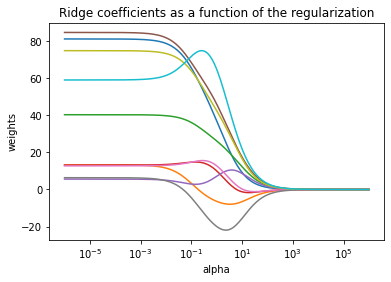

In [48]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

Lasso

Linear model that predict's sparse coefs
Reduces the regressors predicting targe

In [50]:
lasso = Lasso(alpha=.1)
lasso.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

Lasso(alpha=0.1)

In [51]:
lasso.coef_

array([0.5, 0. ])

Elastic Net

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

In [57]:
from sklearn.linear_model import ElasticNet

In [58]:
en = ElasticNet(alpha=.1)

In [59]:
en.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

ElasticNet(alpha=0.1)

In [60]:
en.coef_

array([0.32589556, 0.32579954])

Logistic Regression

Linear Model of classification, assumes linear relationship between feature & target
y = e^(b0 + b1x) / (1 + e^(b0 + b1x))
Returns class probabilities
Hyperparameter : C - regularization coef
Fundamentally suited for bi-class classification

In [61]:
from sklearn.datasets import make_blobs

In [62]:
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=2,centers=2)

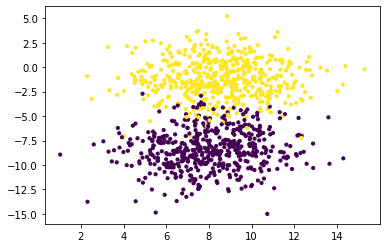

In [63]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [64]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [66]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

<ipython-input-67-b26318ee87aa>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


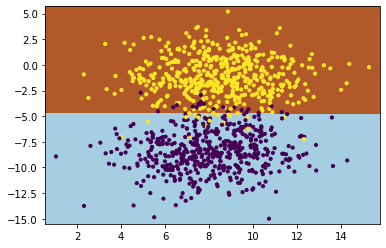

In [67]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

Online Learning Models

Stochastic Gradient Descent & Passive Aggrasive Algorithms
Simple & Efficient to fit linear models
Useful where number of samples is very large ( Scale of 10^5 )
Supports partial_fit for out-of-core learning
Both the algorithms support regression & classification

In [69]:
from sklearn.datasets import make_classification, make_regression

In [70]:
X,y = make_classification(n_classes=2,n_features=10,n_samples=10000)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
trainX,testX, trainY,testY = train_test_split(X,y)

In [73]:
from sklearn.linear_model import SGDClassifier

In [75]:
sgd = SGDClassifier(max_iter=10)

In [76]:
sgd.partial_fit(trainX[:1500],trainY[:1500], classes=[0,1])
sgd.score(testX,testY)

0.838

In [77]:
sgd.partial_fit(trainX[1500:5000],trainY[1500:5000])
sgd.score(testX,testY)

0.8612

Robust Regression

Robust regression is interested in fitting a regression model in the presence of corrupt data: either outliers, or error in the model.
Three techniques supported by scikit - RANSAC, Theil Sen and HuberRegressor

Comparisions RANSAC, Theil Sen, HuberRegressor

HuberRegressor should be faster than RANSAC
Theil Sen and RANSAC are unlikely to be as robust as HuberRegressor for the default parameters.
RANSAC will deal better with large outliers in the y direction
RANSAC is faster than Theil Sen and scales much better with the number of samples
RANSAC is a good default option

In [78]:
n_samples = 1000
n_outliers = 50
X, y, coef = make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [79]:
from sklearn.linear_model import LinearRegression,RANSACRegressor

In [80]:
lr = LinearRegression()
lr.fit(X, y)
ransac = RANSACRegressor()
ransac.fit(X, y)

RANSACRegressor()

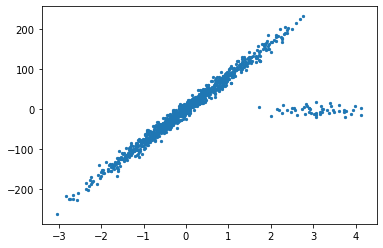

In [81]:
plt.scatter(X,y,s=5)

In [82]:
ransac_pred = ransac.predict(X)

In [83]:
lr_pred = lr.predict(X)

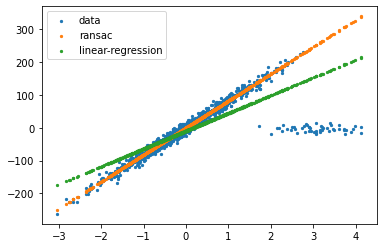

In [84]:
plt.scatter(X,y,s=5, label='data')
plt.scatter(X,ransac_pred,s=5,label='ransac')
plt.scatter(X,lr_pred,s=5, label='linear-regression')
plt.legend()

Polynomial Regression

Sometimes relationship between variables & target is of higher polynomial degree
Transformer can be used to convert data to higher degree
Linear models can predict coef of these higher degree polynomials

In [85]:
from sklearn.datasets import make_circles

In [86]:
X,y = make_circles(n_samples=1000, noise=.04)

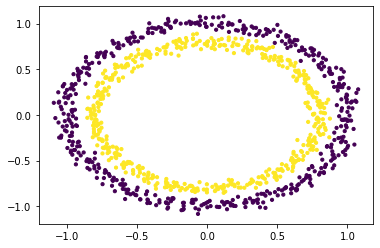

In [87]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
pol = PolynomialFeatures(degree=2)

In [90]:
X_tf = pol.fit_transform(X)

In [91]:
lr = LogisticRegression()

In [92]:
trainX,testX,trainY,testY = train_test_split(X_tf,y)

In [93]:
lr.fit(trainX,trainY)

LogisticRegression()

In [94]:
lr.score(testX,testY)

0.996

In [95]:
lr.coef_

array([[-1.13886114e-04, -4.92207798e-02,  4.62984031e-02,
        -9.48481162e+00, -1.29156437e-01, -9.35699000e+00]])

Bias Variance

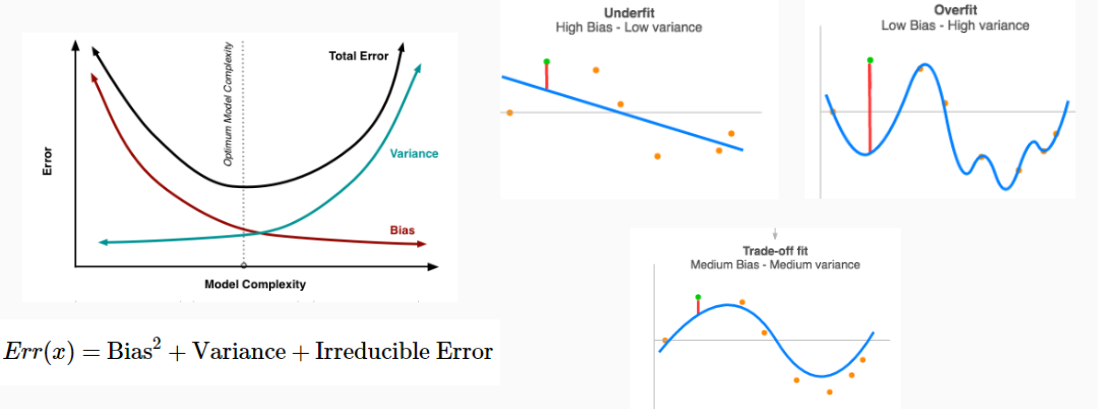

Bias

Fitting training data poorly, but produce similar result outside training data
we are building simple models that predicts terribly far from the reality but they don't change much from dataset to dataset.
Situation of underfitting.
a linear regression model would have high bias when trying to model a non-linear relationship